In [1]:
%reset

import numpy as np
from sklearn import preprocessing
import math
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import pandas as pd
from numpy import *



from sklearn import preprocessing




import tensorflow as tf
from tensorflow import keras
import os
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.model_selection import train_test_split


os.environ["CUDA_VISIBLE_DEVICES"]='1'

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
# do stuff


%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/tensorflow/python/frame

In [2]:
# Import the data and making a dataframe out of it
df_deli = pd.read_csv('../Emilio Caba/Data/Delivery.csv')
df_cons = pd.read_csv('../Emilio Caba/Data/Consumption.csv')
df_info = pd.read_csv('../Emilio Caba/Data/Information.csv')


# Setting indexes
df_deli.set_index('ID-nummer',inplace=True)
df_deli.index = pd.to_datetime(df_deli.index)

df_cons.set_index('ID-nummer',inplace=True)
df_cons.index = pd.to_datetime(df_cons.index)

df_info.set_index('ID-nummer',inplace=True)

In [3]:

# Setting different columns (delivery, consumption, houses_info, dummy_variables)
df = pd.DataFrame(columns=['delivery','consumption'])

ar_deli = np.array([])
ar_cons = np.array([])
for col in range(len(df_deli.columns)):
    ar_deli = np.append(ar_deli, df_deli.values[:, col])
    ar_cons = np.append(ar_cons, df_cons.values[:, col])
    
ar_heatSystem = np.array([])
ar_people = np.array([])
ar_solar_panels = np.array([])
for col in df_info.columns:
    ar_heatSystem = np.append(ar_heatSystem, (df_info.loc[['concept'], [col]].values[0].tolist() * df_deli.shape[0]))
    ar_people = np.append(ar_people, (df_info.loc[['personen'], [col]].values[0].tolist() * df_deli.shape[0]))
    ar_solar_panels = np.append(ar_solar_panels, (df_info.loc[['PV-aantal'], [col]].values[0].tolist() * df_deli.shape[0]))
    

df['delivery'] = pd.Series(ar_deli)
df['consumption'] = pd.Series(ar_cons)
df['heating_sys'] = pd.Series(ar_heatSystem)
df['people'] = pd.Series(ar_people)
df['solar_panels'] = pd.Series(ar_solar_panels)
#df['time'] = pd.Series(df_cons.index)

df.replace('E', 1, inplace=True)
df.replace('WP', 2, inplace=True)
df.replace('Zon', 3, inplace=True)

df


,delivery,consumption,heating_sys,people,solar_panels
0,0.0,0.031,1,4,17
1,0.0,0.037,1,4,17
2,0.0,0.034,1,4,17
3,0.0,0.296,1,4,17
4,0.0,0.311,1,4,17
...,...,...,...,...,...
1532855,0.0,0.032,2,1,10
1532856,0.0,0.210,2,1,10
1532857,0.0,0.474,2,1,10
1532858,0.0,0.263,2,1,10


In [4]:
df.tail()

,delivery,consumption,heating_sys,people,solar_panels
1532855,0.0,0.032,2,1,10
1532856,0.0,0.210,2,1,10
1532857,0.0,0.474,2,1,10
1532858,0.0,0.263,2,1,10
1532859,0.0,0.045,2,1,10


In [5]:

#df["time"] = pd.to_datetime(df["time"])
#df.index = df['time']

clean = df[['delivery', 'consumption']]
#clean = clean.resample('H').sum()
clean




,delivery,consumption
0,0.0,0.031
1,0.0,0.037
2,0.0,0.034
3,0.0,0.296
4,0.0,0.311
...,...,...
1532855,0.0,0.032
1532856,0.0,0.210
1532857,0.0,0.474
1532858,0.0,0.263


In [6]:
#temp = pd.read_csv('KNMI_Voorschoten_20170711_20190601_WithoutHeader_V2.txt', sep=",", header=None)
#temp.columns = ["STN", "YYYYMMDD", "HH", "T",'T10','SQ','Q','N']

In [7]:
#temp = temp.iloc[1536:,:] #droppin out all the data that goes out the consumption&delivery dataframe (sto have same lenght)
#temp

In [8]:

#result = clean.join(temp.set_index(clean.index))
#result

In [9]:
#df = df[(df != 0.0).all(1)]

#commented because the same lenght of datasets
df = df[(df[['delivery', 'consumption']] != 0.0).any(1)] #drop out all the data that has 0 delivery and 0 consumption at the same time

In [10]:
del_heat = df[['delivery', 'consumption','people', 'solar_panels']] #storing only the columns that i want to use to train, (all of them except the target variable)
del_heat

#_______________________________## only using this to the datetime series_________
#del_heat = result[['delivery', 'consumption','YYYYMMDD','HH','T']] #storing only the columns that i want to use to train, (all of them except the target variable)
#del_heat

,delivery,consumption,people,solar_panels
0,0.0,0.031,4,17
1,0.0,0.037,4,17
2,0.0,0.034,4,17
3,0.0,0.296,4,17
4,0.0,0.311,4,17
...,...,...,...,...
1532855,0.0,0.032,1,10
1532856,0.0,0.210,1,10
1532857,0.0,0.474,1,10
1532858,0.0,0.263,1,10


In [11]:
del_heat['people'] = pd.to_numeric(del_heat['people']) #converting to numeric, it was an object
del_heat['solar_panels'] = pd.to_numeric(del_heat['solar_panels']) #converting to numeric, it was an object
del_heat['solar_panels'].max() #checking if it works well


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


17

In [12]:
del_heat.max() #everything appears to be good

delivery         0.911
consumption      3.242
people           4.000
solar_panels    17.000
dtype: float64

In [13]:
#data normalitation
#df_norm = (del_heat-del_heat.max())/(del_heat.max()-del_heat.min)

x = del_heat.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)

df_norm


,0,1,2,3
0,0.0,0.009562,1.0,1.000000
1,0.0,0.011413,1.0,1.000000
2,0.0,0.010487,1.0,1.000000
3,0.0,0.091302,1.0,1.000000
4,0.0,0.095928,1.0,1.000000
...,...,...,...,...
1532731,0.0,0.009870,0.0,0.222222
1532732,0.0,0.064775,0.0,0.222222
1532733,0.0,0.146206,0.0,0.222222
1532734,0.0,0.081123,0.0,0.222222


In [14]:
#df['heating_sys'].unique()
#df['heating_sys']

#salida = df['heating_sys'].resample('H')

df['heating_sys']

0          1
1          1
2          1
3          1
4          1
          ..
1532855    2
1532856    2
1532857    2
1532858    2
1532859    2
Name: heating_sys, Length: 1532736, dtype: int64

In [15]:
total = df_norm.values #array converting from the normalized dataframe 
output = df['heating_sys'] #storing the target variable column

 

output_norm = (output-np.min(output))/(np.max(output)-np.min(output)) #target variable normalitation
output_norm


0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1532855    0.5
1532856    0.5
1532857    0.5
1532858    0.5
1532859    0.5
Name: heating_sys, Length: 1532736, dtype: float64

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(total, output_norm, test_size=0.3) #splitin the 30% of the data to test

In [17]:
X_train.shape

(1072915, 4)

In [18]:
#1)ype of neural network(fully connected)
model = Sequential()

In [19]:
#Modelo del MLP compuesto por una entrada del array de cada imagen de 28x28, capa oculta de 128 neuronas y una de salida de 10
#MLP model based on an array of 



#FIRST LAYER
#-units: Number of neurons in the layer (follow indications in order to avoid minusfitting or overfitting)
#-activation: Función de activación
#activation = funcion_RELU
#-input_dim: Número de entradas de la red


# still thinking in creating a new model or using the basic one (it will depend on the input)

model.add(Dense(units = 15, input_dim = 4, activation = 'relu'))

model.add(Dropout(0.2))#___________________________check if it works better 



#adding next hiden layers 
#unitsF = 1
#activationF = 1/(1+np.exp(-S)) #Sigmoid

#model.add(Dense(25, activation = 'relu'))
#model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) #3 diferent groups ##sigmoid

In [20]:

#-loss: error function.

#-optimizer: how the network will adjust the weights . sgd = optimizers.SGD(lr, decay, momentum)
# check the different optimizers to see wich one fits better
#lr: Learning rate.



lr= 0.01 #0.1 getting 56% accuracy

model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam(lr), metrics = ['accuracy'])



In [21]:
print(X_train.shape) #checking the input shape before start training
print(Y_train.shape)

(1072915, 4)
(1072915,)


# Heatin system prediction

In [22]:

history = model.fit(X_train, Y_train,validation_split = 0.1,  epochs = 30) #storing in the history variable to plot it after (loss and accuracy)


Train on 965623 samples, validate on 107292 samples
Epoch 1/30
965623/965623 [==============================] - 60s 62us/step - loss: 0.0617 - acc: 0.4846 - val_loss: 0.0426 - val_acc: 0.5012
Epoch 2/30
965623/965623 [==============================] - 59s 61us/step - loss: 0.0439 - acc: 0.5018 - val_loss: 0.0424 - val_acc: 0.5009
Epoch 3/30
965623/965623 [==============================] - 60s 62us/step - loss: 0.0434 - acc: 0.5018 - val_loss: 0.0429 - val_acc: 0.4994
Epoch 4/30
965623/965623 [==============================] - 59s 61us/step - loss: 0.0431 - acc: 0.5021 - val_loss: 0.0507 - val_acc: 0.4985
Epoch 5/30
965623/965623 [==============================] - 58s 60us/step - loss: 0.0431 - acc: 0.5022 - val_loss: 0.0418 - val_acc: 0.5002
Epoch 6/30
965623/965623 [==============================] - 59s 61us/step - loss: 0.0430 - acc: 0.5023 - val_loss: 0.0426 - val_acc: 0.5002
Epoch 7/30
965623/965623 [==============================] - 59s 61us/step - loss: 0.0430 - acc: 0.5023 - val

In [23]:
model.evaluate(X_test,Y_test)

459821/459821 [==============================] - 9s 20us/step


[0.046331873279689115, 0.5028087016470101]

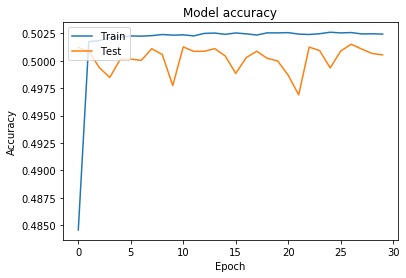

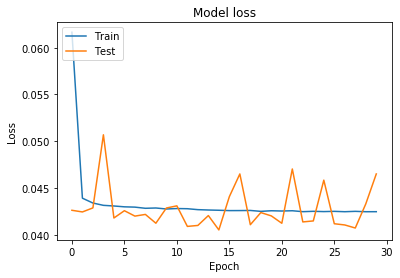

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:


X_predict = model.predict(X_test)
X_predict = X_predict.flatten()

In [26]:
#Y_test = Y_test.values
test = Y_test.values
test

array([0.5, 0.5, 0.5, ..., 0. , 0.5, 0.5])

In [27]:
X_predict

array([0.4334466 , 0.36594918, 0.42467678, ..., 0.02171652, 0.48219448,
       0.45129806], dtype=float32)

In [28]:
#rounding the prediction in order to classify better, the model give us 0.99 for example but its close to 1, this is the reason
#the model give to us only a nearly 50% accuracy
X_predict_round = np.around(X_predict, decimals=1)
test = np.around(test, decimals=1)

In [29]:
test

array([0.5, 0.5, 0.5, ..., 0. , 0.5, 0.5])

[[115391   5662      0]
 [ 16449  33307      0]
 [     0  12038  40040]]


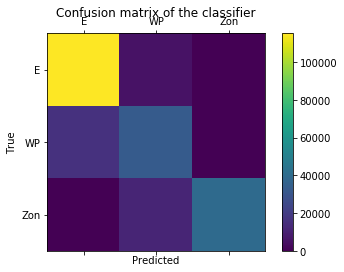

In [30]:
from sklearn.metrics import confusion_matrix

y_test = test * 10 #multiply to 10 to avoid the decimals (the confusion matrix get integers)

pred = X_predict_round*10 #multiply to 10 to avoid the decimals (the confusion matrix get integers)

labels = [0, 5, 10] #the 3 labels we want to find (remember thereare the normalized data * 10)
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + ['E', 'WP', 'Zon'])
ax.set_yticklabels([''] + ['E', 'WP', 'Zon'])
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

print()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.88      0.70      0.78    164652
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.65      0.16      0.25    213604
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       1.00      0.49      0.66     81565

    accuracy                           0.41    459821
   macro avg       0.23      0.12      0.15    459821
weighted avg       0.79      0.41      0.51    459821



In [32]:
#model.evaluate(test, y_predict)

indices = Y_test.index
house_to_pred = 0

print('real: ' + str(test[house_to_pred]))
print('predicted: ' + str(X_predict[house_to_pred]))
print('predicted rounded: ' + str(X_predict_round[house_to_pred]))
print('\nhouse no. ' + str(indices[house_to_pred]))
house_no = indices[house_to_pred]

#indice = Y_test.index[15]
df.iloc[house_no,:]

real: 0.5
predicted: 0.4334466
predicted rounded: 0.4

house no. 727072


delivery           0
consumption     0.08
heating_sys        2
people             4
solar_panels      11
Name: 727127, dtype: object

# People prediction

In [33]:
del_people = df[['delivery', 'consumption','heating_sys', 'solar_panels']] #storing only the columns that i want to use to train, (all of them except the target variable)
del_people

,delivery,consumption,heating_sys,solar_panels
0,0.0,0.031,1,17
1,0.0,0.037,1,17
2,0.0,0.034,1,17
3,0.0,0.296,1,17
4,0.0,0.311,1,17
...,...,...,...,...
1532855,0.0,0.032,2,10
1532856,0.0,0.210,2,10
1532857,0.0,0.474,2,10
1532858,0.0,0.263,2,10


In [34]:

del_people['solar_panels'] = pd.to_numeric(del_people['solar_panels']) #converting to numeric, it was an object
del_people['heating_sys'] = pd.to_numeric(del_people['heating_sys']) #converting to numeric, it was an object


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
x = del_people.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)

df_norm

,0,1,2,3
0,0.0,0.009562,0.0,1.000000
1,0.0,0.011413,0.0,1.000000
2,0.0,0.010487,0.0,1.000000
3,0.0,0.091302,0.0,1.000000
4,0.0,0.095928,0.0,1.000000
...,...,...,...,...
1532731,0.0,0.009870,0.5,0.222222
1532732,0.0,0.064775,0.5,0.222222
1532733,0.0,0.146206,0.5,0.222222
1532734,0.0,0.081123,0.5,0.222222


In [36]:
total = df_norm.values #array converting from the normalized dataframe 


df['people'] = pd.to_numeric(df['people']) #converting to numeric, it was an object

output = df['people'] #storing the target variable column

output_norm = (output-np.min(output))/(np.max(output)-np.min(output)) #target variable normalitation
output_norm.unique() #4 groups of people

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([1.        , 0.33333333, 0.        , 0.66666667])

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(total, output_norm, test_size=0.3) #splitin the 30% of the data to test

In [38]:
history = model.fit(X_train, Y_train,validation_split = 0.1,  epochs = 20) #storing in the history variable to plot it after (loss and accuracy)


Train on 965623 samples, validate on 107292 samples
Epoch 1/20
965623/965623 [==============================] - 58s 60us/step - loss: 0.1639 - acc: 0.4141 - val_loss: 0.1586 - val_acc: 0.4151
Epoch 2/20
965623/965623 [==============================] - 57s 59us/step - loss: 0.1396 - acc: 0.4296 - val_loss: 0.0797 - val_acc: 0.4631
Epoch 3/20
965623/965623 [==============================] - 58s 60us/step - loss: 0.0812 - acc: 0.4565 - val_loss: 0.0789 - val_acc: 0.4492
Epoch 4/20
965623/965623 [==============================] - 57s 59us/step - loss: 0.0808 - acc: 0.4569 - val_loss: 0.0790 - val_acc: 0.4655
Epoch 5/20
965623/965623 [==============================] - 57s 59us/step - loss: 0.0806 - acc: 0.4581 - val_loss: 0.0914 - val_acc: 0.4376
Epoch 6/20
965623/965623 [==============================] - 58s 60us/step - loss: 0.0806 - acc: 0.4585 - val_loss: 0.0796 - val_acc: 0.4629
Epoch 7/20
965623/965623 [==============================] - 55s 57us/step - loss: 0.0806 - acc: 0.4584 - val

In [39]:
model.evaluate(X_test,Y_test)

459821/459821 [==============================] - 10s 21us/step


[0.07822362639109424, 0.44655855213302054]

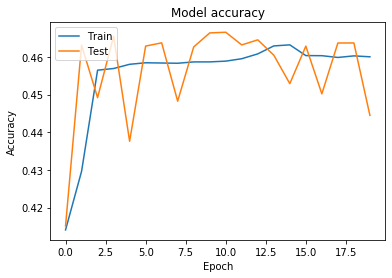

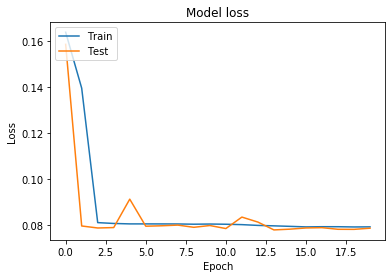

In [40]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
X_predict = model.predict(X_test)
X_predict = X_predict.flatten()

In [42]:
#Y_test = Y_test.values
test = Y_test.values
test

array([0.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
       1.        ])

In [43]:
#rounding the prediction in order to classify better, the model give us 0.99 for example but its close to 1, this is the reason
#the model give to us only a nearly 50% accuracy
X_predict_round = np.around(X_predict, decimals=1)
test = np.around(test, decimals=1)

In [44]:
X_predict

array([0.31714535, 0.4706037 , 0.46943787, ..., 0.3583097 , 0.45952263,
       0.35825223], dtype=float32)

[[19270     0 10011     0]
 [    0     0     0     0]
 [    0     0     0     0]
 [    0     0 21052 82164]]


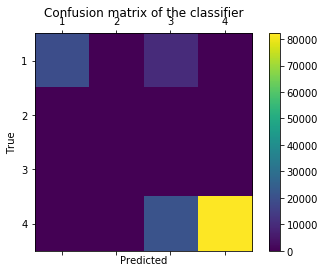

In [45]:
from sklearn.metrics import confusion_matrix

y_test = test * 10 #multiply to 10 to avoid the decimals (the confusion matrix get integers)

pred = X_predict_round*10 #multiply to 10 to avoid the decimals (the confusion matrix get integers)

labels = [0, 3.3, 5, 10] #the 3 labels we want to find (remember thereare the normalized data * 10)
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + ['1', '2', '3', '4'])
ax.set_yticklabels([''] + ['1', '2', '3', '4'])
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

print()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

         0.0       1.00      0.17      0.29    114643
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.81      0.56      0.66    164794
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.79      0.19      0.31     32549
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       1.00      0.56      0.71    147835

    accuracy                           0.44    459821
   macro avg       0.33      0.13      0.18    459821
weighted avg       0.92      0.44      0.56    459821



# solar panels prediction

In [47]:
df_deli = df[(df[['delivery']] != 0.0).any(1)] #deletting the rows of 0 delivery
df_deli




,delivery,consumption,heating_sys,people,solar_panels
31,0.003,0.115,1,4,17
32,0.023,0.000,1,4,17
33,0.022,0.001,1,4,17
34,0.055,0.000,1,4,17
35,0.063,0.128,1,4,17
...,...,...,...,...,...
1532842,0.111,0.003,2,1,10
1532843,0.091,0.000,2,1,10
1532844,0.097,0.003,2,1,10
1532845,0.075,0.000,2,1,10


In [48]:
del_sol = df_deli[['delivery', 'consumption']] #storing only the columns that i want to use to train, (all of them except the target variable)
del_sol

,delivery,consumption
31,0.003,0.115
32,0.023,0.000
33,0.022,0.001
34,0.055,0.000
35,0.063,0.128
...,...,...
1532842,0.111,0.003
1532843,0.091,0.000
1532844,0.097,0.003
1532845,0.075,0.000


In [49]:

#del_sol['people'] = pd.to_numeric(del_sol['people']) #converting to numeric, it was an object
#del_sol['heating_sys'] = pd.to_numeric(del_sol['heating_sys']) #converting to numeric, it was an object


In [50]:
x = del_sol.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)

df_norm

,0,1
0,0.002198,0.035472
1,0.024176,0.000000
2,0.023077,0.000308
3,0.059341,0.000000
4,0.068132,0.039482
...,...,...
531423,0.120879,0.000925
531424,0.098901,0.000000
531425,0.105495,0.000925
531426,0.081319,0.000000


In [51]:
total = df_norm.values #array converting from the normalized dataframe 


df_deli['solar_panels'] = pd.to_numeric(df_deli['solar_panels']) #converting to numeric, it was an object

output = df_deli['solar_panels'] #storing the target variable column
print(np.unique(output))

output_norm = (output-np.min(output))/(np.max(output)-np.min(output)) #target variable normalitation
output_norm.unique() #4 groups of people

[ 8  9 10 11 12 13 14 15 17]


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([1.        , 0.66666667, 0.11111111, 0.33333333, 0.55555556,
       0.77777778, 0.        , 0.22222222, 0.44444444])

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(total, output_norm, test_size=0.3) #splitin the 30% of the data to test

In [53]:
#reshaping the model because i only use 2 input neurons here
model = Sequential()
model.add(Dense(units = 10, input_dim = 2, activation = 'relu'))

In [54]:
model.add(Dense(1, activation = 'sigmoid')) #3 diferent groups ##sigmoid

In [55]:
lr= 0.1 

model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam(lr), metrics = ['accuracy'])


In [56]:
history = model.fit(X_train, Y_train,validation_split = 0.1,  epochs = 5) #storing in the history variable to plot it after (loss and accuracy)


Train on 334799 samples, validate on 37200 samples
Epoch 1/5
334799/334799 [==============================] - 21s 62us/step - loss: 0.0597 - acc: 0.0364 - val_loss: 0.0592 - val_acc: 0.0383
Epoch 2/5
334799/334799 [==============================] - 20s 60us/step - loss: 0.0596 - acc: 0.0365 - val_loss: 0.0594 - val_acc: 0.0357
Epoch 3/5
334799/334799 [==============================] - 20s 61us/step - loss: 0.0596 - acc: 0.0364 - val_loss: 0.0589 - val_acc: 0.0342
Epoch 4/5
334799/334799 [==============================] - 20s 59us/step - loss: 0.0597 - acc: 0.0360 - val_loss: 0.0594 - val_acc: 0.0328
Epoch 5/5
334799/334799 [==============================] - 20s 60us/step - loss: 0.0596 - acc: 0.0362 - val_loss: 0.0593 - val_acc: 0.0351


In [57]:
model.evaluate(X_test,Y_test)

159429/159429 [==============================] - 3s 22us/step


[0.059744554587982814, 0.036530367749907484]

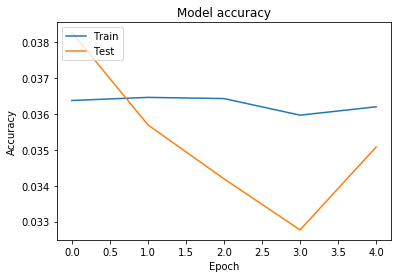

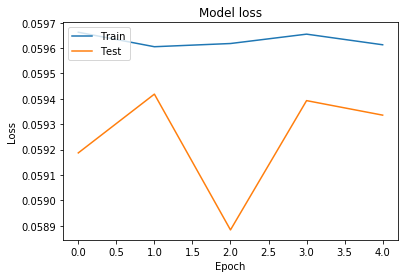

In [58]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [59]:
X_predict = model.predict(X_test)
X_predict = X_predict.flatten()

In [60]:
#Y_test = Y_test.values
test = Y_test.values

In [61]:
#rounding the prediction in order to classify better, the model give us 0.99 for example but its close to 1, this is the reason
#the model give to us only a nearly 50% accuracy
X_predict_round = np.around(X_predict, decimals=1)
test = np.around(test, decimals=1)



[[ 4  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [48  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]


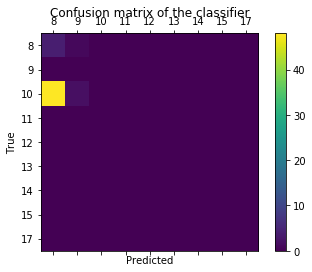

In [62]:
from sklearn.metrics import confusion_matrix

y_test = test * 10 #multiply to 10 to avoid the decimals (the confusion matrix get integers)

pred = X_predict_round*10 #multiply to 10 to avoid the decimals (the confusion matrix get integers)

labels = [8,9,10,11,12,13,14,15,17] #the 3 labels we want to find (remember thereare the normalized data * 10)
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + ['8','9','10','11','12','13','14','15','17'])
ax.set_yticklabels([''] + ['8','9','10','11','12','13','14','15','17'])
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

print()

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      4340
         1.0       0.00      0.00      0.00     26323
         2.0       0.00      0.00      0.00     17402
         3.0       0.00      0.00      0.00     26159
         4.0       0.11      0.84      0.19     17586
         5.0       0.00      0.00      0.00         0
         6.0       0.25      0.07      0.11     19636
         7.0       0.21      0.01      0.01     30338
         8.0       0.03      0.00      0.00     11349
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00      6296

    accuracy                           0.10    159429
   macro avg       0.05      0.08      0.03    159429
weighted avg       0.08      0.10      0.04    159429



/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
